<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/o6_Applied_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Good Links

https://towardsdatascience.com/understanding-lightgbm-parameters-and-how-to-tune-them-6764e20c6e5b


Try different types of configuration and track your results in Neptune

# Library


In [1]:

!pip3 install catboost
!pip install cartopy
!pip install shap


     |████████████████████████████████| 76.3 MB 1.1 MB/s 
     |████████████████████████████████| 10.8 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 17.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 45.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516300 sha256=af3cd733c6089106eb29b45d84b32d03bd4f8b6edac7201d194e3c3a8fad0fc2
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=f344af8a5d41dadc2d5e91f285e863f464c5294c53

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBRegressor

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

from tqdm import tqdm
#
import cartopy
from catboost import CatBoostClassifier
#import shap
#import time
from xgboost import XGBClassifier
import xgboost as xgb
#
import datetime as dt

## Additional packages might be needed

In [3]:
import xgboost as xgb

# Juan's Pre-Defined Functions

In [4]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost.   <<<<<----CAT BOOST   <<<<-------
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

In [5]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [6]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [7]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(10000)):  # <<<<<<---- What should this be at?
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()



    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

# Data

In [9]:
data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

In [10]:
data['date_2'] = data['date']
data['date_2'] = pd.to_datetime(data['date_2'])
data['date_2']= data['date_2'].map(dt.datetime.toordinal)

### move the date column to the index

In [11]:
data =data.set_index('date')

In [ ]:
data.apply(pd.to_numeric)

In [15]:
#y = data['Quantity_Adjusted']
#X = data.loc[: ,data.columns != 'Quantity_Adjusted']

y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

### Split the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

# Scale the data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
data = sc.fit_transform(data)


### Training set mean


In [19]:
mean = X_train.mean()
print(mean)

Seasonal                  -8.433737e-02
Consumer_loans             1.386295e+05
Construction_lic_unt       1.520163e+04
Construction_lic_area      1.382847e+06
Construction_lic_unt_SI    6.753140e+03
                               ...     
Housing_loanlag_12         1.721556e+06
holiday                    2.697674e+00
sunday                     4.348837e+00
working_day                2.325581e+01
date_2                     7.371112e+05
Length: 942, dtype: float64


### Training Test Std Dev

In [20]:
stdev = X_train.std()
print(stdev)

Seasonal                        1.081756
Consumer_loans              16530.136413
Construction_lic_unt         4868.974093
Construction_lic_area      405080.476199
Construction_lic_unt_SI      3193.630891
                               ...      
Housing_loanlag_12         432708.671725
holiday                         4.256843
sunday                          0.482243
working_day                     4.203700
date_2                        467.520677
Length: 942, dtype: float64


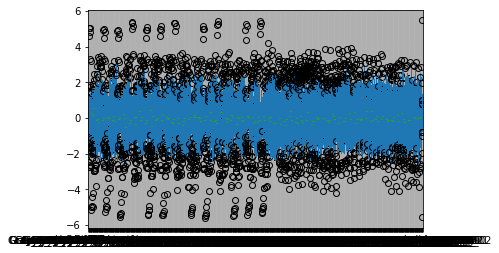

In [21]:
#run without this for KNN first
X_train_st = (X_train - mean)/stdev 
X_train_st.boxplot()

### Test Set preparations, Notice that test is standardized using training set mean and standard deviations

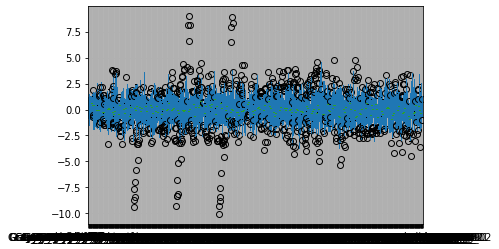

In [22]:
X_test_st = (X_test - mean)/stdev 
X_test_st.boxplot()

# Algorithm Analyisis

# LGBMregressor: Complete data, no adjustent

Test Metrics:
R squared: -0.0933993092250327
Mean Absolute Error: 0.7882421461233462
Mean Squared Error: 0.9298020821687509
Root Mean Squared Error: 0.9642624550239167


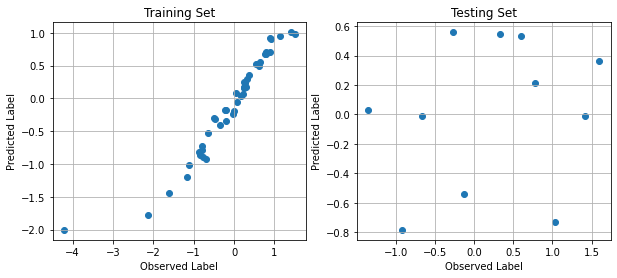

100%|██████████| 10000/10000 [10:59<00:00, 15.16it/s]


Train MSE median: 0.13662450889482025
Test MSE median: 0.6594596481739767

Train_R2 median: 0.8747332440960494
Test_R2 median: 0.06496918361852794


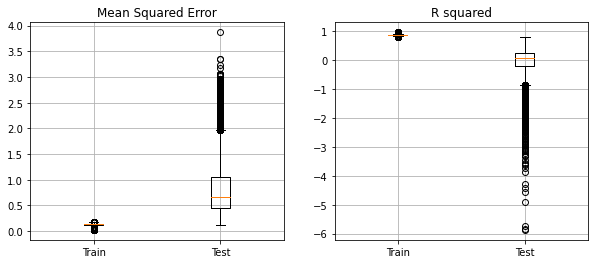

Train MSE standard deviation: 0.03757619706685203
Test MSE standard deviation:  0.5966053923810811

Train_R2 standard deviation: 0.026817185120710553
Test_R2 standard deviation:  0.4738047656652297


In [23]:
#model = KNeighborsRegressor(n_neighbors= 5)
#model = RandomForestRegressor(n_estimators=10) #Number of trees in the forest
#model = ExtraTreesRegressor(n_estimators=10)
#model = GradientBoostingRegressor(n_estimators = 10) #Number of trees in the forest
#model = XGBRegressor(objective="reg:squarederror", random_state=42)
#model = CatBoostRegressor(verbose= 0) #Change fit in functions
model = LGBMRegressor() #Change fit in functions

#Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model,X_train_st,y_train,X_test_st, y_test)

In [24]:
data.shape

(54, 943)

In [25]:
data = pd.DataFrame(data)

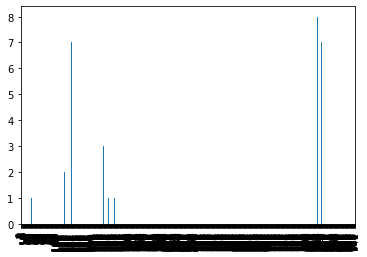

In [26]:
Features = data.columns[0:942]

Feature_importances = pd.Series(model.feature_importances_, index=Features)
Feature_importances.plot.bar()

In [27]:
model = LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20) 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

Would be nice to get feature selection

Nice to plot prediction line v actual


### LGBM REGRESSOR Metrics original data

*   Model_Performance(model,X_train,y_train,X_test, y_test)
*   Metrics(y_test, y_pred_Test)

*   Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

*   Multiple_Runs(model,X_train,y_train,X_test, y_test)





### Model Performance

Test Metrics:
R squared: -0.04349434301268884
Mean Absolute Error: 0.8055323729012209
Mean Squared Error: 0.887364025821627
Root Mean Squared Error: 0.9420000137057467


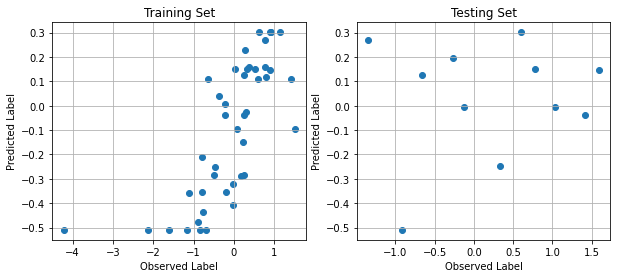

100%|██████████| 10000/10000 [08:57<00:00, 18.62it/s]


Train MSE median: 0.6974694386315194
Test MSE median: 0.6897577413709767

Train_R2 median: 0.3471661651222425
Test_R2 median: 0.01639053401352636


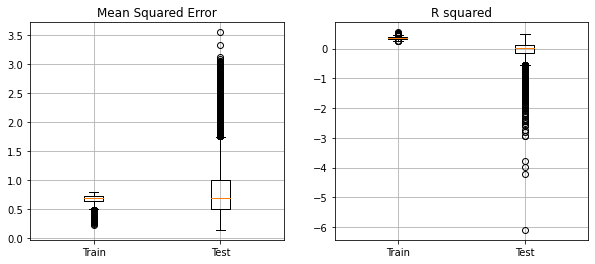

Train MSE standard deviation: 0.1253254741109237
Test MSE standard deviation:  0.6722004670381548

Train_R2 standard deviation: 0.034264777650788523
Test_R2 standard deviation:  0.2999269918404258


In [29]:
# Juan's
# Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model ,X_train,y_train,X_test, y_test )

### Metrics(y_test, y_pred_Test)

In [30]:
y_pred_Test = model.predict(X_test) #Predictions
Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.26018325542364096
Mean Absolute Error: 0.6432160199088645
Mean Squared Error: 0.6291234535514347
Root Mean Squared Error: 0.7931730287594472


### Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

In [31]:
#y_pred_Train = model.predict(X_train) #Predictions
#Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple_Runs(model,X_train,y_train,X_test, y_test) 100 Runs

100%|██████████| 10000/10000 [08:44<00:00, 19.08it/s]


Train MSE median: 0.6987864209987398
Test MSE median: 0.6835013135267312

Train_R2 median: 0.3474391082518933
Test_R2 median: 0.019951049937500853


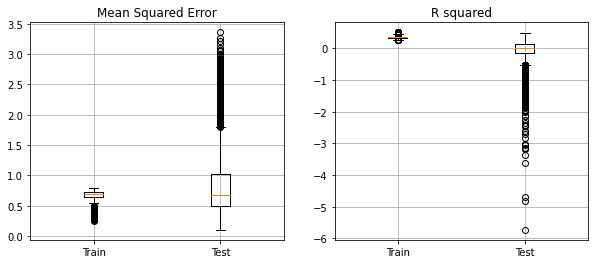

Train MSE standard deviation: 0.12600848468620446
Test MSE standard deviation:  0.674994978350417

Train_R2 standard deviation: 0.034683819733267354
Test_R2 standard deviation:  0.30640196260455416


In [32]:
Multiple_Runs(model,X_train,y_train,X_test, y_test)

### Multiple Runs 1ooo

100%|██████████| 10000/10000 [08:46<00:00, 18.98it/s]


Train MSE median: 0.6969555207276033
Test MSE median: 0.6868686463333489

Train_R2 median: 0.34722648431013214
Test_R2 median: 0.013892493871184908


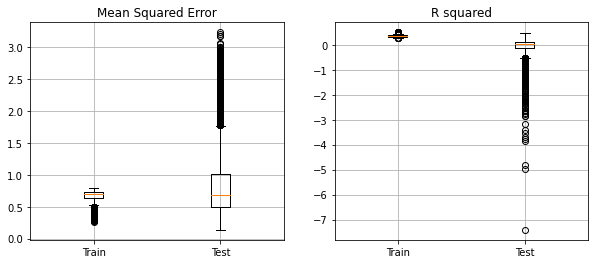

Train MSE standard deviation: 0.12625931035461635
Test MSE standard deviation:  0.6763460420217812

Train_R2 standard deviation: 0.03439462028658042
Test_R2 standard deviation:  0.31716822899302977


In [33]:
Multiple_Runs(model,X_train,y_train,X_test, y_test)

Multiple Runs 1o,ooo

100%|██████████| 10000/10000 [08:49<00:00, 18.90it/s]


Train MSE median: 0.6976289019500581
Test MSE median: 0.6916265434320523

Train_R2 median: 0.3474110105361744
Test_R2 median: 0.012800584853535524


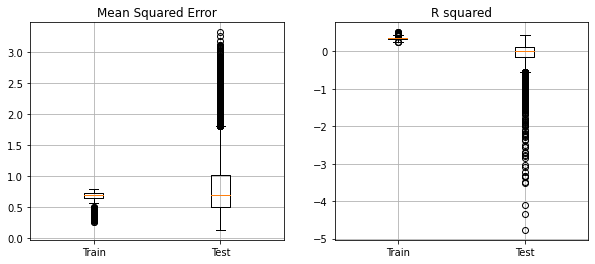

Train MSE standard deviation: 0.12584963810335292
Test MSE standard deviation:  0.6761276131473781

Train_R2 standard deviation: 0.034322173947346664
Test_R2 standard deviation:  0.3145705082163693


In [34]:
Multiple_Runs(model,X_train,y_train,X_test, y_test)